confusion matrix
binary clasification models accuracy
stablish 1 label as positive and other as negative
Jedi = positive
Sith = negative

prediction   real
-----------------
Jedi         Jedi    true positive
Sith         Sith    true negative
Jedi         Sith    false positive
Sith         Jedi    false negative

Compare, count and make a matrix

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
with open ("../truth.txt", 'r') as file:
    truth_labels = [line.strip() for line in file]

with open("../predictions.txt", 'r') as file:
    prediction_labels = [line.strip() for line in file]

In [35]:
def confusion_matrix(truth_labels, prediction_labels):
    true_positive = true_negative = false_positive = false_negative = 0
    
    for real, pred in zip(truth_labels, prediction_labels):
        if real == 'Jedi' and pred == 'Jedi':
            true_positive += 1
        elif real == 'Sith' and pred == 'Sith':
            true_negative += 1
        elif real == 'Jedi' and pred == 'Sith':
            false_positive += 1
        elif real == 'Sith' and pred == 'Jedi':
            false_negative += 1
    
    return np.array([[true_positive, false_positive], [false_negative, true_negative]])


confusion_matrix = confusion_matrix(truth_labels, prediction_labels)
print(confusion_matrix)

[[25 24]
 [30 21]]


# Metrics

Precision:
----------
proportion of true positive cases between predicted positives

precision = true_positives / (true_positives + false_positives)

high precision means when the model predicts positive theres a high probability of being correct
precision is useful when the cost of false positives is high. For example, in a spam detection system, high accuracy means that when the system marks an email as spam, it is very likely that it is spam.

Recall:
-------

proportion of true positive cases correctly identified

recall = true_positives / (true_positives + false_negatives)

Recall is important when the cost of false negatives is high. For example, in disease detection, high recall means that the model correctly identifies most sick patients.

F-1 Score:
----------

Is the harmonic mean between precision and recall, providing a single value that balances both metrics.

F1-Score = 2 * (Precisión * Recall) / (Precisión + Recall)

The F1-Score is useful when looking for a balance between precision and recall, especially on imbalanced datasets. It provides a unique measure of the model's effectiveness.

Accuracy:
---------

Accuracy measures the proportion of correct predictions (both positive and negative) among the total number of cases examined.
 Accuracy = true_positivesP +true_negativesP) / true_positives + true_negatives + false_positives + false_negativesN

Accuracy is useful when classes are balanced. However, it can be misleading on imbalanced datasets.)

In [36]:
def calculate_metrics(confusion_matrix):
    [[tp, fp], [fn, tn]] = confusion_matrix
    
    # metrics for Jedi
    jedi_precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    jedi_recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    jedi_f1 = 2 * (jedi_precision * jedi_recall) / (jedi_precision + jedi_recall) if (jedi_precision + jedi_recall) > 0 else 0
    
    # metrics for Sith
    sith_precision = tn / (tn + fn) if (tn + fn) > 0 else 0
    sith_recall = tn / (tn + fp) if (tn + fp) > 0 else 0
    sith_f1 = 2 * (sith_precision * sith_recall) / (sith_precision + sith_recall) if (sith_precision + sith_recall) > 0 else 0
    
    # accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # totals
    jedi_total = tp + fn
    sith_total = tn + fp
    
    return {
        'Jedi': (jedi_precision, jedi_recall, jedi_f1, jedi_total),
        'Sith': (sith_precision, sith_recall, sith_f1, sith_total),
        'accuracy': accuracy,
        'total': jedi_total + sith_total
    }

In [37]:
def print_formatted_output(metrics):
    print("          precision recall f1-score total")
    print(f"Jedi      {metrics['Jedi'][0]:.2f}      {metrics['Jedi'][1]:.2f}   {metrics['Jedi'][2]:.2f}     {metrics['Jedi'][3]}")
    print(f"Sith      {metrics['Sith'][0]:.2f}      {metrics['Sith'][1]:.2f}   {metrics['Sith'][2]:.2f}     {metrics['Sith'][3]}")
    print(f"accuracy                   {metrics['accuracy']:.2f}    {metrics['total']}")

In [38]:
metrics = calculate_metrics(confusion_matrix)
print_formatted_output(metrics)

          precision recall f1-score total
Jedi      0.51      0.45   0.48     55
Sith      0.41      0.47   0.44     45
accuracy                   0.46    100


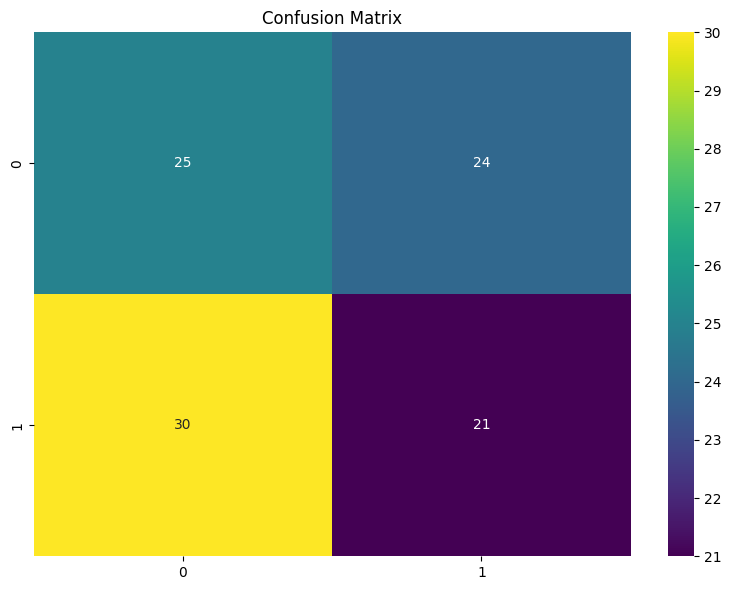

In [49]:
class_names = ['0', '1']

plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
#plt.ylabel('Etiqueta Verdadera')
#plt.xlabel('Etiqueta Predicha')
plt.tight_layout()
plt.show()